## 2.7 Lag plots

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.0)

In [4]:
aus_production = pd.read_csv('../data/tsibbledata/aus_production.csv')

In [8]:
recent_production = (aus_production
.assign(Date=pd.to_datetime(aus_production.Quarter.str.replace(' ', '')))
.query('Date.dt.year >= 2000')
)

In [65]:
def get_subplots_shape(n):
    n_cols = int(np.ceil(np.sqrt(n)))
    n_rows = int(np.ceil(n / n_cols))
    return n_cols, n_rows

In [66]:
def sns_lagplot(df, col, date_col, n_lags=1, lag_freq='year', figsize=(9, 8)):
    df_lags = pd.DataFrame({lag: df[col].shift(lag) for lag in range(n_lags+1)})
    if lag_freq == 'year':
        df_lags['date_interval'] = df[date_col].dt.year
    if lag_freq == 'month':
        df_lags['date_interval'] = df[date_col].dt.month
    if lag_freq == 'day':
        df_lags['date_interval'] = df[date_col].dt.day
    if lag_freq == 'quarter':
        df_lags['date_interval'] = df[date_col].dt.quarter
    
    n_cols, n_rows = get_subplots_shape(n_lags)
    fig, axes = plt.subplots(n_cols, n_rows, figsize=figsize, sharex=True, sharey=True)
    for (i, ax) in enumerate(axes.ravel()):
        for (date_int, d) in df_lags.groupby('date_interval'):
            ax.plot(d[i+1], d[0], '.', alpha=.66, label=f'{date_int}')
            lim = ax.get_xlim()
        ax.plot(lim, lim, 'k--', alpha=.25, zorder=-10)
        ax.set(xlim=lim, ylim=lim, title=f'Lag {i+1}', aspect='equal')
    axes.ravel()[5].legend(loc='center left', bbox_to_anchor=[1, .5], title=f'{lag_freq.capitalize()}')
    fig.text(.5, -.01, f'lag({col}, k)', ha='center', va='bottom')
    fig.text(0, .5, f'{col}', ha='center', va='bottom', rotation=90)
    plt.tight_layout()

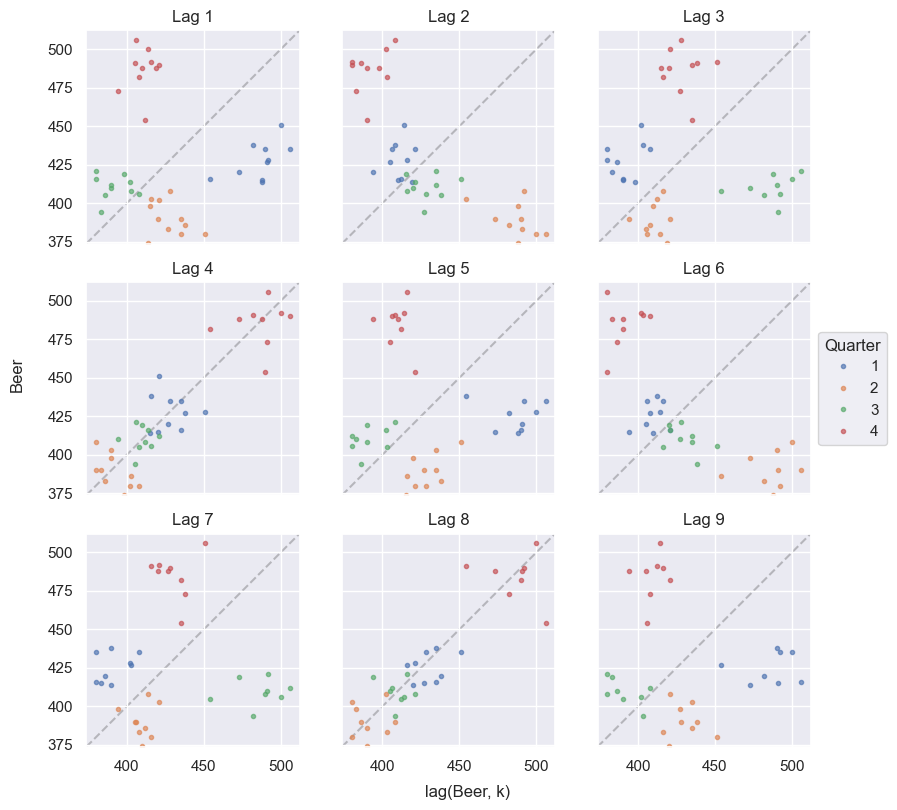

In [67]:
sns_lagplot(df_rp, col='Beer', date_col='Date', n_lags=9, lag_freq='quarter')

Here the colours indicate the quarter of the variable on the vertical axis. The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data. The negative relationship seen for lags 2 and 6 occurs because peaks (in Q4) are plotted against troughs (in Q2)